In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
#Library
import torch
import numpy as np
from torch.autograd import Variable
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt

In [20]:
#Make a dataset

class CoordinateDataset(Dataset):   
    def __init__(self):
        #Enter the address of data
        csvData=np.loadtxt('/content/drive/My Drive/data_spiral.csv',delimiter=',',dtype=np.float32)
        self.len=csvData.shape[0]
        self.X=torch.from_numpy(csvData[:,:2]) #coordinates
        self.Y=torch.from_numpy(csvData[:,-1]).type(torch.LongTensor) #class
        
    def __getitem__(self,index):
        return self.X[index], self.Y[index]
    
    def __len__(self):
        return self.len
    
dataset = CoordinateDataset()
train_loader = DataLoader(dataset = dataset,
                         batch_size=32,
                         shuffle=True,
                         num_workers=0)

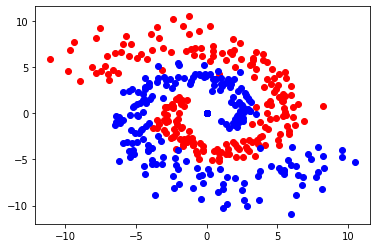

In [21]:
#Display the data
#Not required

#Enter the address of data
data=np.loadtxt('/content/drive/My Drive/data_spiral.csv',delimiter=',',dtype=np.float32)

zeroData=np.zeros((400,2))
oneData=np.zeros((400,2))

for i in range(data.shape[0]):
  if (data[i,-1]==0):
    zeroData[i,0]=data[i,0]
    zeroData[i,1]=data[i,1]
  else:
    oneData[i,0]=data[i,0]
    oneData[i,1]=data[i,1]

plt.scatter(zeroData[:,0],zeroData[:,1],c='r')
plt.scatter(oneData[:,0],oneData[:,1],c='b')

## 기존 코드

In [22]:
#Make a model

class Net(torch.nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        self.relu = torch.nn.ReLU()
        self.tanh = torch.nn.Tanh()
        self.l1=torch.nn.Linear(2,4) 
        self.l2=torch.nn.Linear(4,2) 
        
        
    def forward(self,x):
        x = self.relu(self.l1(x))
        x = self.l2(x)
        return x

model = Net()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.005)

# Training loop
print("START EPOCH")
for epoch in range(100):
    #print("EPOCH : {} / 100".format(epoch+1))
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)

        y_pred = model(inputs)

        loss = criterion(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
print("END")

START EPOCH
END


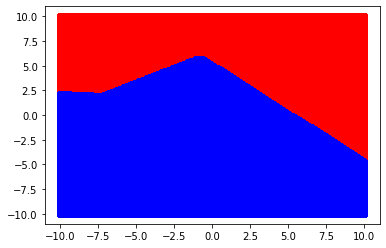

In [23]:
#Make a test set and display results
#Test set consists of 200*200 points

testData = np.zeros((200*200,2))
twoD = np.linspace(-10,10,200)
a=0
for i in range(200):
  for j in range(200):
    testData[a,0]=twoD[j,]
    testData[a,1]=twoD[i,]
    a=a+1
testData = torch.from_numpy(np.float32(testData))

redX = []
redY = []
blueX = []
blueY = []

for i, data in enumerate(train_loader):
        # get the inputs
        inputs, labels = data
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # Forward pass: Compute predicted y by passing x to the model
        testPred = model(testData)
        # Compute and print loss
        v,r = testPred.max(1)
        r = (r.detach().cpu().numpy())
        coor = (testData.detach().cpu().numpy())

        for j in range(len(r)):
          if (r[j]==0):
            redX.append(coor[j][0])
            redY.append(coor[j][1])
          else:
            blueX.append(coor[j][0])
            blueY.append(coor[j][1])

plt.scatter(redX, redY, c='r')
plt.scatter(blueX, blueY, c='b')

## Question a
다음과 같이 수정하였다.  
1. Network 구조: 레이어를 추가하여 deep neural network를 구현하였다.
    - 2->4->8->16->8->4->2
2. 파라미터: Epoch를 100->200으로 수정

In [24]:
#Make a model

class Net(torch.nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        self.relu = torch.nn.ReLU()
        self.tanh = torch.nn.Tanh()
        self.l1=torch.nn.Linear(2,4) 
        self.l2=torch.nn.Linear(4,8) 
        self.l3=torch.nn.Linear(8,16) 
        self.l4=torch.nn.Linear(16,8) 
        self.l5=torch.nn.Linear(8,4) 
        self.l6=torch.nn.Linear(4,2) 
        
        
    def forward(self,x):
        x = self.relu(self.l1(x))
        x = self.relu(self.l2(x))
        x = self.relu(self.l3(x))
        x = self.relu(self.l4(x))
        x = self.relu(self.l5(x))
        x = self.l6(x)
        return x

model = Net()

In [25]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.005)

# Training loop
print("START EPOCH")
for epoch in range(200):
    
    model.train()
    train_loss=0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)

        y_pred = model(inputs)

        loss = criterion(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    if epoch % 20 ==0: print("Epoch [{}/{}] Loss: {:.4f}".format(epoch + 1, 200, train_loss))

print("END")

START EPOCH
Epoch [1/200] Loss: 9.0103
Epoch [21/200] Loss: 3.1431
Epoch [41/200] Loss: 1.3954
Epoch [61/200] Loss: 1.1445
Epoch [81/200] Loss: 0.6958
Epoch [101/200] Loss: 1.6808
Epoch [121/200] Loss: 0.5850
Epoch [141/200] Loss: 0.5693
Epoch [161/200] Loss: 0.5248
Epoch [181/200] Loss: 0.5520
END


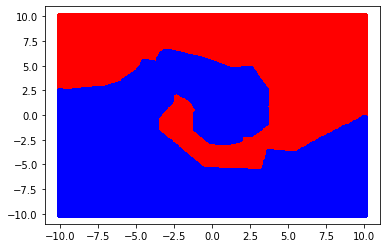

In [26]:
#Make a test set and display results
#Test set consists of 200*200 points

testData = np.zeros((200*200,2))
twoD = np.linspace(-10,10,200)
a=0
for i in range(200):
  for j in range(200):
    testData[a,0]=twoD[j,]
    testData[a,1]=twoD[i,]
    a=a+1
testData = torch.from_numpy(np.float32(testData))

redX = []
redY = []
blueX = []
blueY = []

for i, data in enumerate(train_loader):
        # get the inputs
        inputs, labels = data
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # Forward pass: Compute predicted y by passing x to the model
        testPred = model(testData)
        # Compute and print loss
        v,r = testPred.max(1)
        r = (r.detach().cpu().numpy())
        coor = (testData.detach().cpu().numpy())

        for j in range(len(r)):
          if (r[j]==0):
            redX.append(coor[j][0])
            redY.append(coor[j][1])
          else:
            blueX.append(coor[j][0])
            blueY.append(coor[j][1])

plt.scatter(redX, redY, c='r')
plt.scatter(blueX, blueY, c='b')

전보다 더 학습이 잘 된 양상을 볼 수 있다.  

## Question b
non-linear activation인 self.relu를 삭제처리하였다.

In [27]:
class Net2(torch.nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        self.relu = torch.nn.ReLU()
        self.tanh = torch.nn.Tanh()
        self.l1=torch.nn.Linear(2,4) 
        self.l2=torch.nn.Linear(4,8) 
        self.l3=torch.nn.Linear(8,16) 
        self.l4=torch.nn.Linear(16,8) 
        self.l5=torch.nn.Linear(8,4) 
        self.l6=torch.nn.Linear(4,2) 
        
        
    def forward(self,x):
        x = self.l1(x)
        x = self.l2(x)
        x = self.l3(x)
        x = self.l4(x)
        x = self.l5(x)
        x = self.l6(x)
        return x

model = Net()

In [28]:
# Training loop
print("START EPOCH")
for epoch in range(200):
    
    model.train()
    train_loss=0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)

        y_pred = model(inputs)

        loss = criterion(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    if epoch % 20 ==0: print("Epoch [{}/{}] Loss: {:.4f}".format(epoch + 1, 200, train_loss))

print("END")

START EPOCH
Epoch [1/200] Loss: 9.0276
Epoch [21/200] Loss: 9.0261
Epoch [41/200] Loss: 9.0350
Epoch [61/200] Loss: 9.0319
Epoch [81/200] Loss: 9.0346
Epoch [101/200] Loss: 9.0340
Epoch [121/200] Loss: 9.0365
Epoch [141/200] Loss: 9.0450
Epoch [161/200] Loss: 9.0410
Epoch [181/200] Loss: 9.0371
END


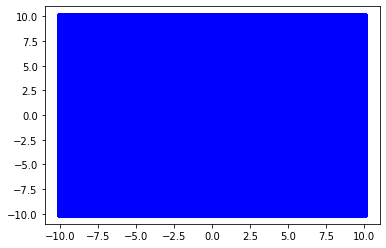

In [29]:
#Make a test set and display results
#Test set consists of 200*200 points

testData = np.zeros((200*200,2))
twoD = np.linspace(-10,10,200)
a=0
for i in range(200):
  for j in range(200):
    testData[a,0]=twoD[j,]
    testData[a,1]=twoD[i,]
    a=a+1
testData = torch.from_numpy(np.float32(testData))

redX = []
redY = []
blueX = []
blueY = []

for i, data in enumerate(train_loader):
        # get the inputs
        inputs, labels = data
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # Forward pass: Compute predicted y by passing x to the model
        testPred = model(testData)
        # Compute and print loss
        v,r = testPred.max(1)
        r = (r.detach().cpu().numpy())
        coor = (testData.detach().cpu().numpy())

        for j in range(len(r)):
          if (r[j]==0):
            redX.append(coor[j][0])
            redY.append(coor[j][1])
          else:
            blueX.append(coor[j][0])
            blueY.append(coor[j][1])

plt.scatter(redX, redY, c='r')
plt.scatter(blueX, blueY, c='b')

non-linear activation을 하지 않음으로써 0~1 값으로 한정되는 것이 아닌 이외의 값들이 다 허용되는것으로 값들이 다 1보다 커져서 1인 파란색 데이터 만이 존재함을 알 수 있다.